## Financial News and Stock Price Integration
 This notebook shows the relationship between financial news data and stock market returns through Natural Language Processing (NLP) techniques

Tasks: 
    1. Date Alignment: aligning the stock data with news data based on dates to correlate market movements with news sentiment.
    2. Sentiment Analysis: Conducting sentiment analysis on news headlines to quantify the tone of each article (positive, negative, neutral).
    
    Analysis:
        - Calculate Daily Stock Returns: Computing the percentage change in daily closing prices to represent stock  movements.
        Correlation Analysis: Using statistical methods to test the correlation between daily news sentiment scores and stock returns.

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [6]:
from scripts.sentiment_correlation_analysis import *

In [7]:
# Load and stock and news data
data_directory = "../data/yfinance_data/"  
stock_data = merge_stocks(data_directory)

news_data=pd.read_csv('../data/raw_analyst_ratings.csv')

### Descriptive Statistics

In [8]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [9]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [10]:
stock_data.shape

(45428, 10)

In [11]:
news_data.shape

(1407328, 6)

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          45428 non-null  datetime64[ns]
 1   Open          45428 non-null  float64       
 2   High          45428 non-null  float64       
 3   Low           45428 non-null  float64       
 4   Close         45428 non-null  float64       
 5   Adj Close     45428 non-null  float64       
 6   Volume        45428 non-null  int64         
 7   Dividends     45428 non-null  float64       
 8   Stock Splits  45428 non-null  float64       
 9   Stock         45428 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.8+ MB


In [13]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [14]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,2009-04-26 08:53:21.549704960,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000
std,NaN,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291


In [15]:
# start and end date for news data 
print(f"Start date of news_data: {news_data['date'].min()}")
print(f"End date of news_data: {news_data['date'].max()}")

# start and end date for stock data 
print(f"Start date of stock_data: {stock_data['Date'].min()}")
print(f"End date of stock_data: {stock_data['Date'].max()}")

Start date of news_data: 2009-02-14 00:00:00
End date of news_data: 2020-06-11 17:12:35-04:00
Start date of stock_data: 1980-12-12 00:00:00
End date of stock_data: 2024-07-30 00:00:00


### stock and news timeline 

In [16]:
# Ensure date columns are in datetime format Calculate daily returns
#stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
news_data['date'] = pd.to_datetime(news_data['date'], utc=True, format='mixed')

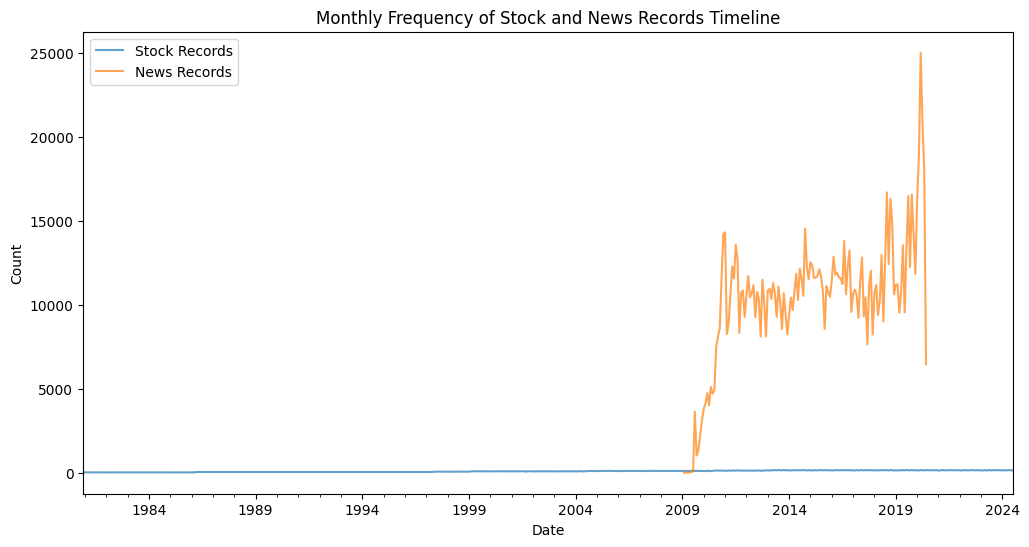

In [17]:
#  monthly frequency of the number of records 
stock = stock_data.resample('ME', on='Date').size()
news = news_data.resample('ME', on='date').size()

plt.figure(figsize=(12, 6))
stock.plot(label='Stock Records', alpha=0.7)
news.plot(label='News Records', alpha=0.7)
plt.title('Monthly Frequency of Stock and News Records Timeline')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()